In [90]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]
del var, all

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import sys
sys.path.append('../CodesFromProfessor')
from breguet_range_equation_fromprofessor import *

In [92]:
def obj_func(x:torch.tensor) -> torch.tensor:
    return breguet_range(x[:, 0], x[:, 1], 162400.0, 100.0)

In [93]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        n_inputs = 2;
        n_layer1 = 50;
        n_layer2 = 100;
        n_layer3 = 50;
        n_outputs = 1;
        # Specify layers of the neural network.
        self.hidden1 = torch.nn.Linear(n_inputs, n_layer1) # 2 inputs, n_layer1 neurons
        self.hidden2 = torch.nn.Linear(n_layer1, n_layer2) # n_layer1 inputs, n_layer2 neurons
        self.hidden3 = torch.nn.Linear(n_layer2, n_layer3) # n_layer2 inputs, n_layer3 neurons
        self.output_layer = torch.nn.Linear(n_layer3, n_outputs) # n_layer3 inputs, 1 output
        
        # Initialize weights and biases.
        torch.nn.init.eye_(self.hidden1.weight);
        torch.nn.init.ones_(self.hidden1.bias);
        torch.nn.init.eye_(self.hidden2.weight);
        torch.nn.init.ones_(self.hidden2.bias);
        torch.nn.init.eye_(self.hidden3.weight);
        torch.nn.init.ones_(self.hidden3.bias);
        torch.nn.init.eye_(self.output_layer.weight);
        torch.nn.init.ones_(self.output_layer.bias);

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output_layer(x)
        return x

class Net_test(torch.nn.Module):
    def __init__(self):
        super(Net_test, self).__init__()
        n_inputs = 2;
        n_layer1 = 10;
        n_layer2 = 10;
        n_outputs = 1;
        # Specify layers of the neural network.
        self.hidden1 = torch.nn.Linear(n_inputs, n_layer1) # 2 inputs, n_layer1 neurons
        self.hidden2 = torch.nn.Linear(n_layer1, n_layer2) # n_layer1 inputs, n_layer2 neurons
        self.output_layer = torch.nn.Linear(n_layer2, n_outputs) # n_layer3 inputs, 1 output
        
        # Initialize weights and biases.
        torch.nn.init.eye_(self.hidden1.weight);
        torch.nn.init.ones_(self.hidden1.bias);
        torch.nn.init.eye_(self.hidden2.weight);
        torch.nn.init.ones_(self.hidden2.bias);
        torch.nn.init.eye_(self.output_layer.weight);
        torch.nn.init.ones_(self.output_layer.bias);

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output_layer(x)
        return x

def get_trained_objfunc(n_samples_1d): 

    # Data to train the neural network.
    x_1d =  torch.linspace(10, 200, n_samples_1d);
    y_1d =  torch.linspace(1250, 25000, n_samples_1d);
    x_samples,y_samples = np.meshgrid(x_1d, y_1d);
    xy_tensor = torch.from_numpy(np.concatenate((x_samples.reshape(n_samples_1d**2,1), y_samples.reshape(n_samples_1d**2,1)),axis=1));
    f_exact = obj_func(xy_tensor).unsqueeze(1);
    
    f_scaled = f_exact / f_exact.abs().max()
    print(f'f_exact.abs().max() : {f_exact.abs().max()}')
    f_neural_net = Net()
    loss_function = torch.nn.MSELoss() # Using squared L2 norm of the error.
    optimizer = torch.optim.Adam(f_neural_net.parameters(), lr=0.005)  # Using Adam optimizer.

    log_loss = []

    print("Training neural network of objective function");
    for epoch in range(10000):
        optimizer.zero_grad()
        outputs = f_neural_net(xy_tensor)
        loss = loss_function(outputs, f_scaled)
        loss.backward() # Backpropagation and computing gradients w.r.t. weights and biases.
        optimizer.step() # Update weights and biases.

        log_loss.append(loss.detach().numpy())

        if epoch % 500 == 0:
            print("Epoch {}: Loss = {}".format(epoch, loss.detach().numpy()))

    print("Finished training neural network of objective function");

    return f_neural_net, log_loss;

def get_trained_objfunc2(n_samples_1d): 

    # Data to train the neural network.
    x_1d =  torch.linspace(10, 200, n_samples_1d);
    y_1d =  torch.linspace(1250, 25000, n_samples_1d);
    x_samples,y_samples = np.meshgrid(x_1d, y_1d);
    xy_tensor = torch.from_numpy(np.concatenate((x_samples.reshape(n_samples_1d**2,1), y_samples.reshape(n_samples_1d**2,1)),axis=1));
    f_exact = obj_func(xy_tensor).unsqueeze(1);
    
    f_scaled = f_exact / f_exact.abs().max()
    print(f'f_exact.abs().max() : {f_exact.abs().max()}')
    f_neural_net = Net_test()
    loss_function = torch.nn.MSELoss() # Using squared L2 norm of the error.
    optimizer = torch.optim.Adam(f_neural_net.parameters(), lr=0.005)  # Using Adam optimizer.

    log_loss = []

    print("Training neural network of objective function");
    for epoch in range(10000):
        optimizer.zero_grad()
        outputs = f_neural_net(xy_tensor)
        loss = loss_function(outputs, f_scaled)
        loss.backward() # Backpropagation and computing gradients w.r.t. weights and biases.
        optimizer.step() # Update weights and biases.

        log_loss.append(loss.detach().numpy())

        if epoch % 500 == 0:
            print("Epoch {}: Loss = {}".format(epoch, loss.detach().numpy()))

    print("Finished training neural network of objective function");

    return f_neural_net, log_loss;

## 3. Breguet Range eqn using Neural Network(NN)
Solve the unconstrained Brequet Range equation from Assignment 2 but use a Neural Network approach.  
You may use the provided code to optimize the Rosenbrock as a starting point.  
In your report, please provide the following:

#### (a) Train a Neural Network to compute the Brequet Range Equation. Define the initial sample set to be 50 data points (pairs of velocity and altitude) and decide on the number of epochs.

##### - Provide a plot of the convergence of the loss function as a number of epochs. (Note: Use 10000 as the maximum number of epochs and you may choose toincrease it if necessary)

In [94]:
# sample data : 7 / n_inputs = 2; n_layer1 = 10; n_layer2 = 10; n_outputs = 1
fr_a_1, log_loss_a_1 = get_trained_objfunc2(7)

f_exact.abs().max() : 14874.58984375
Training neural network of objective function
Epoch 0: Loss = 15582.796875
Epoch 500: Loss = 0.170798659324646
Epoch 1000: Loss = 0.13346655666828156
Epoch 1500: Loss = 0.1172540932893753
Epoch 2000: Loss = 0.10258111357688904
Epoch 2500: Loss = 0.09152934700250626
Epoch 3000: Loss = 0.08490324020385742
Epoch 3500: Loss = 0.08179004490375519
Epoch 4000: Loss = 0.08047069609165192
Epoch 4500: Loss = 0.08003736287355423
Epoch 5000: Loss = 0.07991273701190948
Epoch 5500: Loss = 0.07989367097616196
Epoch 6000: Loss = 0.07994727045297623
Epoch 6500: Loss = 0.07989688962697983
Epoch 7000: Loss = 0.07989685982465744
Epoch 7500: Loss = 0.07990603893995285
Epoch 8000: Loss = 0.07990584522485733
Epoch 8500: Loss = 0.07990581542253494
Epoch 9000: Loss = 0.07991507649421692
Epoch 9500: Loss = 0.07991498708724976
Finished training neural network of objective function


Text(0.5, 0.98, 'Fig 6. Loss - sample data : 7 \n n_inputs = 2, n_layer1 = 10, n_layer2 = 10, n_outputs = 1')

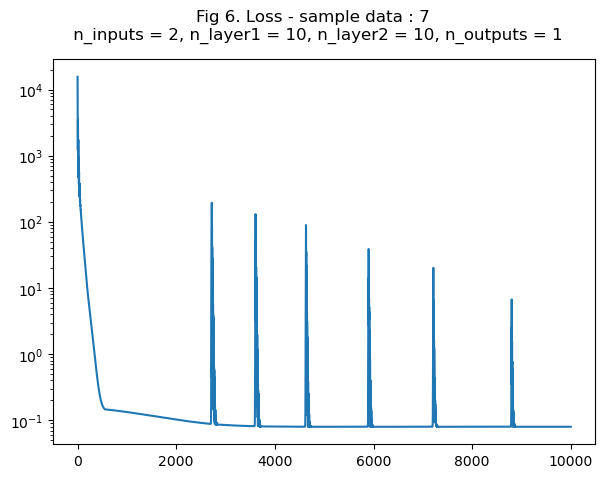

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(log_loss_a_1, label='loss')
ax.set_yscale('log')
fig.suptitle('Fig 6. Loss - sample data : 7 \n n_inputs = 2, n_layer1 = 10, n_layer2 = 10, n_outputs = 1')

#### - Change the size of the initial sample set and compare the convergence of the loss function as a number of epochs.

In [96]:
# sample data : 50 / n_inputs = 2; n_layer1 = 10; n_layer2 = 10; n_outputs = 1
fr_a_2, log_loss_a_2 = get_trained_objfunc2(50)

f_exact.abs().max() : 15278.9013671875
Training neural network of objective function
Epoch 0: Loss = 14700.4130859375
Epoch 500: Loss = 2.2624950408935547
Epoch 1000: Loss = 0.28561949729919434
Epoch 1500: Loss = 0.130758136510849
Epoch 2000: Loss = 0.1014384776353836
Epoch 2500: Loss = 0.0888722762465477
Epoch 3000: Loss = 0.08708067238330841
Epoch 3500: Loss = 0.07849319279193878
Epoch 4000: Loss = 0.07756180316209793
Epoch 4500: Loss = 0.0754406675696373
Epoch 5000: Loss = 0.07548630237579346
Epoch 5500: Loss = 0.075055330991745
Epoch 6000: Loss = 0.07521291822195053
Epoch 6500: Loss = 0.07505495846271515
Epoch 7000: Loss = 0.07505445927381516
Epoch 7500: Loss = 0.07508036494255066
Epoch 8000: Loss = 0.07508016377687454
Epoch 8500: Loss = 0.07507995516061783
Epoch 9000: Loss = 0.07512041926383972
Epoch 9500: Loss = 0.07511994987726212
Finished training neural network of objective function


Text(0.5, 0.98, 'Fig 7. Loss - sample data : 50 \n n_inputs = 2, n_layer1 = 10, n_layer2 = 10, n_outputs = 1')

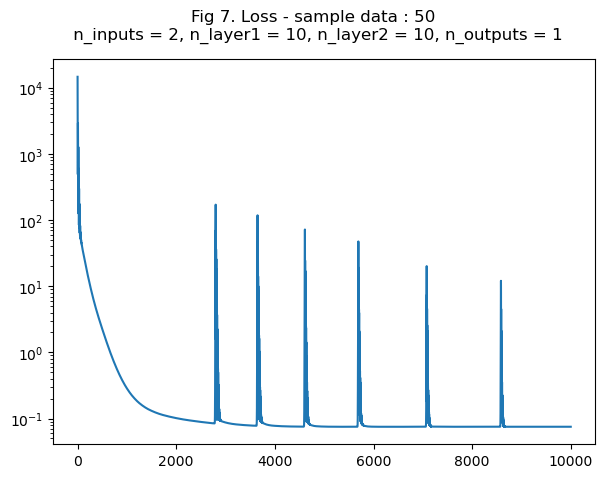

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(log_loss_a_2, label='loss')
ax.set_yscale('log')
fig.suptitle('Fig 7. Loss - sample data : 50 \n n_inputs = 2, n_layer1 = 10, n_layer2 = 10, n_outputs = 1')

#### - Change the Neural Network model itself. You may choose at least two different parameters: such as number of hidden layers, size of nodes per hidden layer, etc. Compare the convergence of the loss function between the cases.

In [98]:
# sample data : 50 / n_inputs = 2; n_layer1 = 50; n_layer2 = 100; n_layer2 = 50; n_outputs = 1
fr, log_loss = get_trained_objfunc(50)

f_exact.abs().max() : 15278.9013671875
Training neural network of objective function
Epoch 0: Loss = 14916.75
Epoch 500: Loss = 0.3507004678249359
Epoch 1000: Loss = 0.18180952966213226
Epoch 1500: Loss = 0.10095685720443726
Epoch 2000: Loss = 0.07888087630271912
Epoch 2500: Loss = 0.07558285444974899
Epoch 3000: Loss = 0.07534201443195343
Epoch 3500: Loss = 0.07533477246761322
Epoch 4000: Loss = 0.07533470541238785
Epoch 4500: Loss = 0.07533469051122665
Epoch 5000: Loss = 0.07533469051122665
Epoch 5500: Loss = 0.07533470541238785
Epoch 6000: Loss = 0.07533470541238785
Epoch 6500: Loss = 0.07533469796180725
Epoch 7000: Loss = 0.07533469796180725
Epoch 7500: Loss = 0.07533469796180725
Epoch 8000: Loss = 0.07533469796180725
Epoch 8500: Loss = 0.07533469796180725
Epoch 9000: Loss = 0.07533469796180725
Epoch 9500: Loss = 0.07533469796180725
Finished training neural network of objective function


Text(0.5, 0.98, 'Fig 8. Loss - sample data : 50 \n n_inputs = 2, n_layer1 = 50, n_layer2 = 100, n_layer3 = 50, n_outputs = 1')

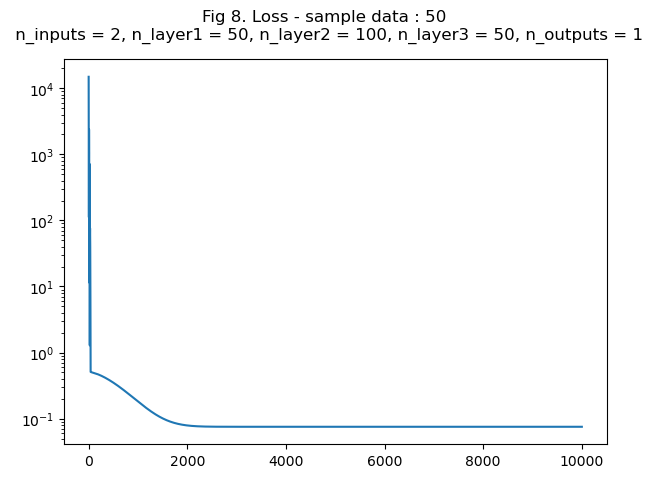

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(log_loss, label='loss')
ax.set_yscale('log')
fig.suptitle('Fig 8. Loss - sample data : 50 \n n_inputs = 2, n_layer1 = 50, n_layer2 = 100, n_layer3 = 50, n_outputs = 1')

#### (b) Build a Neural Network model to optimize the Brequet Range Equation.

In [100]:
class Net_optimizationproblem(torch.nn.Module):
    def __init__(self,f_neural_net, constraints):
        super(Net_optimizationproblem, self).__init__()
        self.f_neural_net = f_neural_net; # NN of Objective function
        for param in self.f_neural_net.parameters(): # Keep the NN objective function weights and biases constant
            param.requires_grad = False; # Does not compute gradients wrt weights and biases of the objective function.
        self.constraints = constraints; 
        self.linear = torch.nn.Linear(2,2); # Define NN of the Optimization Problem
        torch.nn.init.eye_(self.linear.weight);
        torch.nn.init.zeros_(self.linear.bias);


    def forward(self, x):
        x = self.linear(x);
        f_val = self.f_neural_net(x).squeeze();
        #f_val = obj_func(x); # Can also use the analytical objective function.
        constraints_val_1 = self.constraints[0](x);
        constraints_val_2 = self.constraints[1](x); 
        constraints_val_3 = self.constraints[2](x); 
        constraints_val_4 = self.constraints[3](x); 

        output = f_val + 10*(torch.relu(-constraints_val_1) + torch.relu(-constraints_val_2) + torch.relu(-constraints_val_3) + torch.relu(-constraints_val_4));
        return output;

#Custom loss function for optimization.
class CustomLoss(torch.nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, predictions):
        return predictions;


def run_optimizer(objfunc_neural_net, constraints):
    optimization_problem = Net_optimizationproblem(objfunc_neural_net, constraints);
    loss_function = CustomLoss()
    optimizer = torch.optim.NAdam(optimization_problem.parameters(), lr=0.01);

    x_initial = torch.Tensor(1,2);
    x_initial[:,0] = 50.0;
    x_initial[:,1] = 10000.0;
    for epoch in range(10000):
        optimizer.zero_grad() # Gradient of wrt weights and biases are set to zero.
        outputs = optimization_problem(x_initial)
        loss = loss_function(outputs)
        loss.backward() # Backward propagation with automatic differentiation. Compute d (Obj_fun) / d (weights and biases)
        optimizer.step() # Updates weights and biases with specified learning rate
        if epoch % 1000 == 0:
            print("Epoch {}: Loss = {}".format(epoch, loss.detach().numpy()))

    x_optimal = optimization_problem.linear(x_initial);
    print("Optimal point = ", x_optimal);
    return x_optimal;

In [101]:
def c1(x): # v >= 1 [m/s]
    return x[0][0] - 1.0

def c2(x): # v <= 540*1000/3600 [m/s]
    return -x[0][0] + 540*1000/3600

def c3(x): # v >= 1 [m]
    return x[0][1] - 1.0

def c4(x): # v <= 20000 [m]
    return -x[0][1] + 2*1e4

####  - Provide a plot of the convergence of the objective function as a number of epochs. Increase the number of epochs and determine the final required number of epochs.
####  - Compare the convergence against the SQP approach with respect to time per iteration.  

Unfortunately I didn't have enough time to modify above functions for solving it. But the problem seems to be about the scaling issue.  
Because I scaled training data when training fr, the order of fr might not be adeuqate to just handle by itself. And it would affect penalized loss function.

In [ ]:
run_optimizer(fr, [c1, c2, c3, c4])

TypeError: unsupported operand type(s) for *: 'Net' and 'float'